In [1]:
priors = [1 / 3, 1 / 3, 1 / 3]
likelihoods = [0.3, 0.2, 7 / 11]

In [2]:
import numpy as np

np.multiply(priors, likelihoods)

array([0.1       , 0.06666667, 0.21212121])

In [3]:
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [4]:
bayes_rule(priors, likelihoods)

array([0.264, 0.176, 0.56 ])

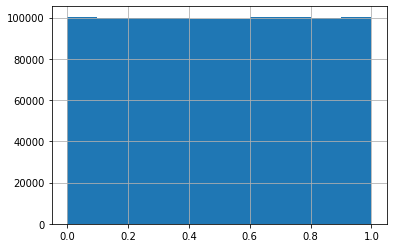

In [5]:
import pandas as pd

%matplotlib inline

n_draws = 1000000
prior = pd.Series(np.random.uniform(0, 1, n_draws))

prior.hist();

In [6]:
n_visits = 50
buyers = 10

In [7]:
def generative_model(probability):
    return np.random.binomial(n_visits, probability)

In [8]:
generative_model(0.5)

22

In [9]:
sim_data = []
for p in prior[:10]:
    print(p)
    print(generative_model(p))
    sim_data.append(generative_model(p))

0.9674921671464062
47
0.3998102338154711
21
0.6172306576653057
35
0.6121985699160315
31
0.5844855471462146
26
0.4062842411381684
27
0.022151790535208105
0
0.34203938423609215
17
0.4224135906655151
27
0.5683017742560943
28


In [10]:
%%timeit

sim_data = []
for p in prior:
    sim_data.append(generative_model(p))

1.5 s ± 50.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%timeit
# Max improvements

sim_data = list(map(lambda x: generative_model(x), prior))

1.46 s ± 112 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%timeit
# Delia improvements

sim_data = list(map(lambda x: np.random.binomial(n_visits, x), prior))

1.45 s ± 29.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit
# Alberto improvements

sim_data = list(map(generative_model, prior))

1.46 s ± 41.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%%timeit
# Pedro improvements

sim_data = [np.random.binomial(n_visits, x) for x in prior]

1.35 s ± 39.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%%timeit
# David improvements

sim_data = np.random.binomial(n_visits, prior)

154 ms ± 6.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
sim_data = np.random.binomial(n_visits, prior)
posteriors = prior[[i for i, x in enumerate(sim_data) if x == buyers]]

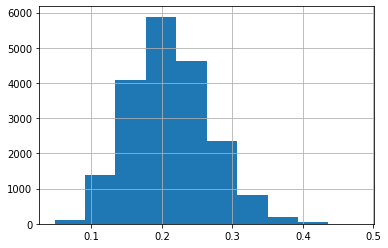

In [21]:
posteriors.hist();

In [22]:
rounded = posteriors.round(2)
mode = rounded.mode()

In [23]:
mode = mode[0]

In [24]:
mode

0.21

In [25]:
len(rounded[rounded == mode]) / len(rounded)

0.07156772275197375